# IPOPT Example 

In [1]:
import cyipopt
print("IPOPT successfully imported!")


IPOPT successfully imported!


## Define a simple optimization problem

In [2]:
import numpy as np
import cyipopt

class RosenbrockNLP(cyipopt.Problem):
    def __init__(self):
        n = 2  # number of variables
        m = 1  # number of constraints
        x_L = np.array([-2.0, -2.0])
        x_U = np.array([ 2.0,  2.0])
        g_L = np.array([1.0])
        g_U = np.array([1.0])
        super().__init__(n=n, m=m, lb=x_L, ub=x_U, cl=g_L, cu=g_U)

    # Objective function
    def objective(self, x):
        return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2

    # Gradient
    def gradient(self, x):
        dfdx0 = -2 * (1 - x[0]) - 400 * x[0] * (x[1] - x[0]**2)
        dfdx1 = 200 * (x[1] - x[0]**2)
        return np.array([dfdx0, dfdx1])

    # Constraints
    def constraints(self, x):
        return np.array([x[0] + 2*x[1]])

    # Jacobian
    def jacobian(self, x):
        return np.array([1.0, 2.0])

# Instantiate problem
nlp = RosenbrockNLP()
nlp.add_option('tol', 1e-8)

# Initial guess
x0 = np.array([0.5, 0.5])

# Solve
solution, info = nlp.solve(x0)

print("✅ Solution:", solution)
print("Objective value:", info['obj_val'])



******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.19, running with linear solver MUMPS 5.7.3.

Number of nonzeros in equality constraint Jacobian...:        2
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        0

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        2
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number of inequality c

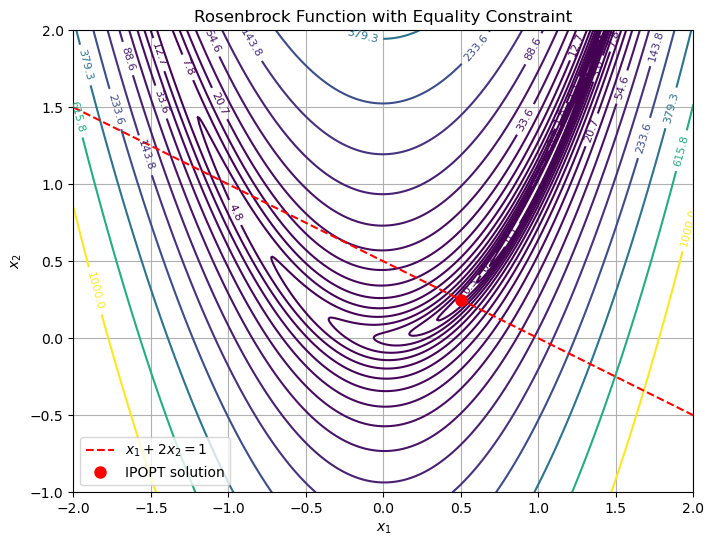

In [3]:
import matplotlib.pyplot as plt

# Create a grid of (x1, x2)
x1 = np.linspace(-2, 2, 400)
x2 = np.linspace(-1, 2, 400)
X1, X2 = np.meshgrid(x1, x2)

# Compute the objective function over the grid
Z = (1 - X1)**2 + 100 * (X2 - X1**2)**2

# Plot contours of the Rosenbrock function
plt.figure(figsize=(8, 6))
contour = plt.contour(X1, X2, Z, levels=np.logspace(-1, 3, 20), cmap="viridis")
plt.clabel(contour, inline=True, fontsize=8)

# Plot the constraint line x1 + 2x2 = 1
x1_line = np.linspace(-2, 2, 100)
x2_line = (1 - x1_line) / 2
plt.plot(x1_line, x2_line, 'r--', label=r'$x_1 + 2x_2 = 1$')

# Mark the IPOPT solution
plt.plot(solution[0], solution[1], 'ro', markersize=8, label='IPOPT solution')

# Labels and legend
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Rosenbrock Function with Equality Constraint')
plt.legend()
plt.grid(True)
plt.show()
